<a href="https://colab.research.google.com/github/RisyadFaisalH/Case_Study_2-DM-/blob/main/Case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv('https://github.com/RisyadFaisalH/Case_Study_2-DM-/blob/ce4e45c27c29f1b685d26d12babaa5c478d2d075/audit_risk.csv?raw=true')

data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


**STEP 1**

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of instances = 776
Number of attributes = 27


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


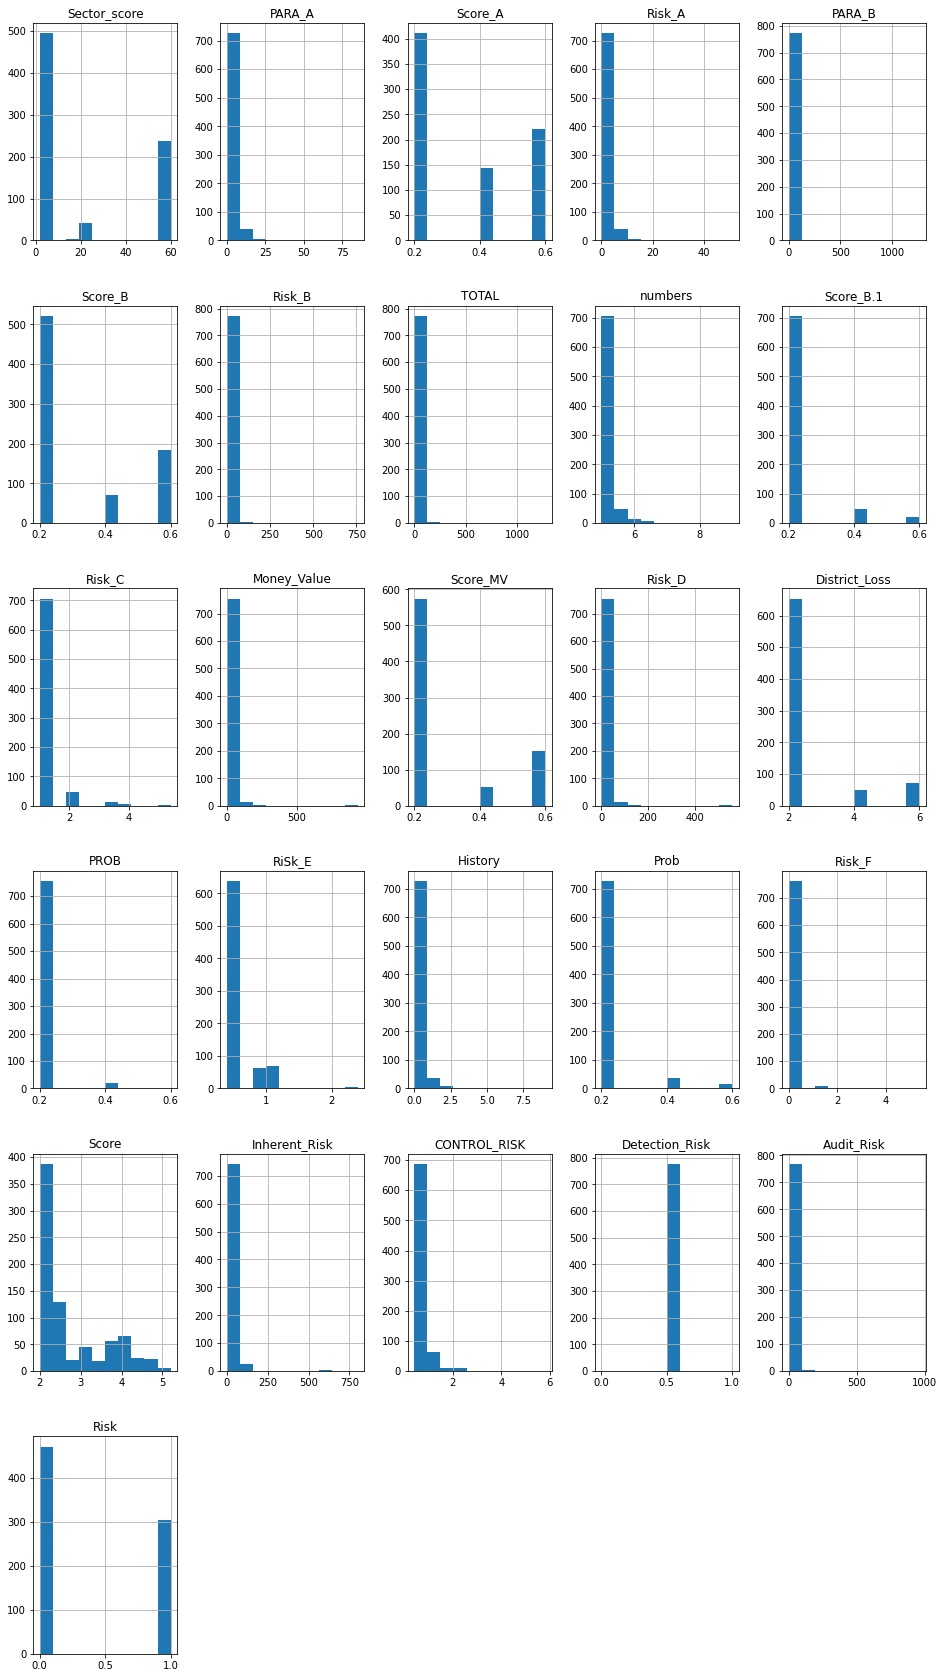

In [ ]:
data.hist(figsize= (16, 30));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


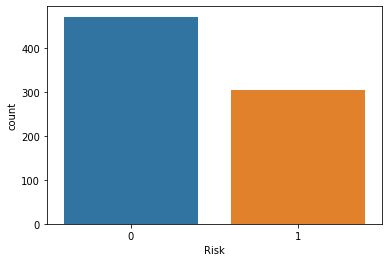

In [ ]:
sns.countplot(data['Risk'], label = "Count")

In [ ]:
data.Risk.value_counts() 

0    471
1    305
Name: Risk, dtype: int64

In [ ]:
# Frequency of an Attribute
data.Sector_score.value_counts() 

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

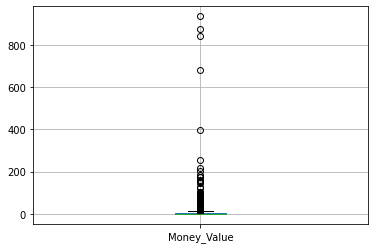

In [ ]:
data.boxplot('Money_Value')

In [ ]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092,-0.39
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22,0.38
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2,0.62
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22,0.39
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.38,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
TOTAL,-0.15,0.27,0.3,0.27,0.99,0.38,0.99,1.0,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.089,0.21,0.33,0.2,0.43,0.69,0.2,nan,0.89,0.29
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26,0.35


**STEP 3**

In [ ]:
#DEDUPLICATION
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
data = data.drop_duplicates()
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 13
Duplicate Rows except first occurrence based on all columns are :
     Sector_score LOCATION_ID  PARA_A  ...  Detection_Risk  Audit_Risk  Risk
265          2.72          15    0.00  ...             0.5      0.2800     0
474          1.85          16    0.00  ...             0.5      0.2800     0
600         55.57           8    0.00  ...             0.5      0.2800     0
659         55.57           5    0.00  ...             0.5      0.2800     0
679         55.57           9    0.00  ...             0.5      0.2800     0
695         55.57          12    0.00  ...             0.5      0.2800     0
696         55.57          12    0.00  ...             0.5      0.2800     0
704         55.57           8    0.00  ...             0.5      0.2800     0
715         55.57          27    0.00  ...             0.5      0.2800     0
716         55.57           2    0.00  ...             0.5      1.3200     1
742         55.57          15    0.00  ...             0.

In [ ]:
#MISSING VALUE
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
data = data.fillna(0)
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
#TRANSFORMATION ATTRIBUTE
data.LOCATION_ID.value_counts() 

8          74
19         68
16         51
9          51
12         44
5          43
2          40
4          37
13         35
6          33
15         33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
43          7
27          7
25          6
20          5
36          4
38          4
30          4
7           4
40          3
3           3
35          2
41          1
LOHARU      1
33          1
24          1
23          1
44          1
SAFIDON     1
42          1
NUH         1
34          1
17          1
Name: LOCATION_ID, dtype: int64

In [ ]:
data['LOCATION_ID'] = data['LOCATION_ID'].replace(['LOHARU'],'45')
data['LOCATION_ID'] = data['LOCATION_ID'].replace(['NUH'],'46')
data['LOCATION_ID'] = data['LOCATION_ID'].replace(['SAFIDON'],'47')
data.LOCATION_ID.value_counts() 

8     74
19    68
16    51
9     51
12    44
5     43
2     40
4     37
13    35
15    33
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
28     8
21     8
43     7
27     7
25     6
20     5
38     4
7      4
30     4
36     4
40     3
3      3
35     2
42     1
46     1
34     1
23     1
47     1
17     1
44     1
33     1
45     1
41     1
24     1
Name: LOCATION_ID, dtype: int64

In [ ]:
#Define variable
X = data.drop(['Risk', 'Detection_Risk', 'LOCATION_ID', 'TOTAL' ], axis =1)
X

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,55.57,0.75,0.2,0.150,0.45,0.2,0.090,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.640,0.4,0.3280
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880


In [ ]:
Y = data['Risk']

In [ ]:
#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

In [ ]:
#scalling
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

In [ ]:
#Logistic Regression
logi = LogisticRegression(random_state = 0, penalty = 'none')
logi.fit(X_train_scaled, Y_train)

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train_scaled, y = Y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

y_predict_logi = logi.predict(X_test_scaled)
acc= accuracy_score(Y_test, y_predict_logi)
roc=roc_auc_score(Y_test, y_predict_logi)
prec = precision_score(Y_test, y_predict_logi)
rec = recall_score(Y_test, y_predict_logi)
f1 = f1_score(Y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.973856,0.980328,1.0,0.934426,0.966102,0.967213


In [ ]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, Y_train)

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_gnb = cross_val_score(estimator = gnb, X = X_train_scaled, y = Y_train, cv = kfold,scoring=scoring)
acc_gnb.mean()

y_predict_gnb = gnb.predict(X_test_scaled)
acc= accuracy_score(Y_test, y_predict_gnb)
roc=roc_auc_score(Y_test, y_predict_gnb)
prec = precision_score(Y_test, y_predict_gnb)
rec = recall_score(Y_test, y_predict_gnb)
f1 = f1_score(Y_test, y_predict_gnb)

model_results = pd.DataFrame([['Naive-Bayes',acc, acc_gnb.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index=True)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.973856,0.980328,1.000000,0.934426,0.966102,0.967213
1,Naive-Bayes,0.941176,0.970492,0.964286,0.885246,0.923077,0.931753


In [ ]:
#Descission tree
clf = DecisionTreeClassifier().fit(X_train_scaled, Y_train)

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_clf = cross_val_score(estimator = clf, X = X_train_scaled, y = Y_train, cv = kfold,scoring=scoring)
acc_clf.mean()

y_predict_clf = clf.predict(X_test_scaled)
acc= accuracy_score(Y_test, y_predict_clf)
roc=roc_auc_score(Y_test, y_predict_clf)
prec = precision_score(Y_test, y_predict_clf)
rec = recall_score(Y_test, y_predict_clf)
f1 = f1_score(Y_test, y_predict_clf)

model_results = pd.DataFrame([['Decision Tree',acc, acc_clf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index=True)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.973856,0.980328,1.000000,0.934426,0.966102,0.967213
1,Naive-Bayes,0.941176,0.970492,0.964286,0.885246,0.923077,0.931753
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
